# Task 1: Einfaches Neuronales Netz (ohne Hidden Layer)

In dieser Aufgabe implementieren wir ein **einfaches neuronales Netz** zur Klassifikation des Spiral-Datensatzes. Dieses Modell hat **keine versteckten Schichten** und dient als Baseline.

## 1. Setup und Daten laden

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

# Laden der Implementierungen
from src.simple_nn import SimpleNeuralNetwork
from src.visualization import plot_training_curve, plot_decision_regions

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Spiral-Datensatz laden
data = np.load("../data/spiral_dataset.npz")

X_train = data["X_train"]
y_train = data["y_train"]  # One-hot encoded
X_test = data["X_test"]
y_test = data["y_test"]

print(f"Training data: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test data: {X_test.shape[0]} samples")
print(f"Number of classes: {y_train.shape[1]}")

Training data: 210 samples, 2 features
Test data: 90 samples
Number of classes: 3


## 2. Visualisierung des Spiral-Datensatzes

Der Datensatz besteht aus **3 Klassen**, die spiralförmig im 2D-Raum angeordnet sind. Diese Struktur ist **nicht linear separierbar**.

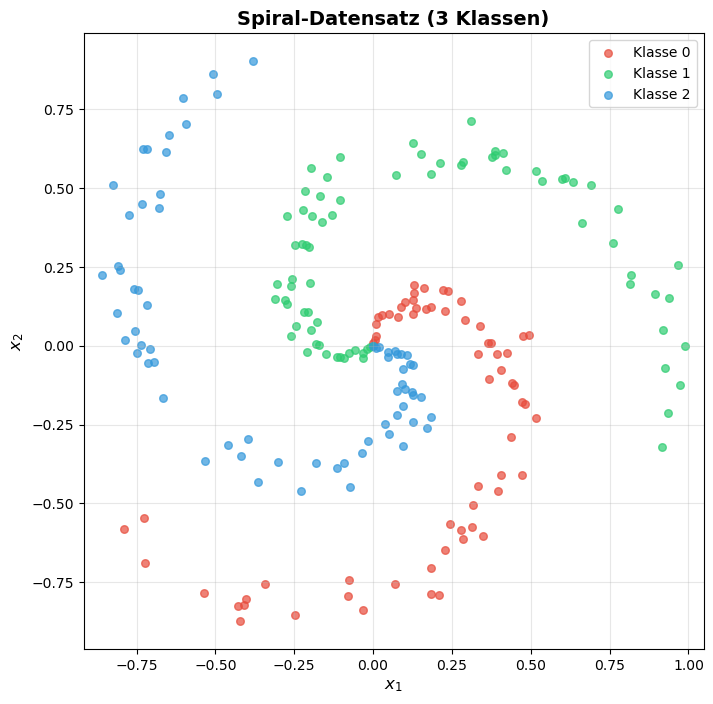

In [3]:
# Visualisierung des Datensatzes
plt.figure(figsize=(8, 8))

# Konvertiere one-hot zu Klassenindizes
y_train_labels = np.argmax(y_train, axis=1)

# Farben für jede Klasse
colors = ['#e74c3c', '#2ecc71', '#3498db']
class_names = ['Klasse 0', 'Klasse 1', 'Klasse 2']

for i in range(3):
    mask = y_train_labels == i
    plt.scatter(X_train[mask, 0], X_train[mask, 1], 
                c=colors[i], label=class_names[i], s=30, alpha=0.7)

plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('Spiral-Datensatz (3 Klassen)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.axis('equal')
plt.show()

## 3. Training des einfachen neuronalen Netzes

In [5]:
# Modell erstellen und trainieren
model = SimpleNeuralNetwork(lr=0.1, epochs=500)

print("Training startet...")
model.fit(X_train, y_train)
print(f"Training abgeschlossen nach {len(model.loss_history)} Epochen")
print(f"Finaler Loss: {model.loss_history[-1]:.4f}")

Training startet...
Training abgeschlossen nach 500 Epochen
Finaler Loss: 0.0932


## 4. Lernkurve visualisieren

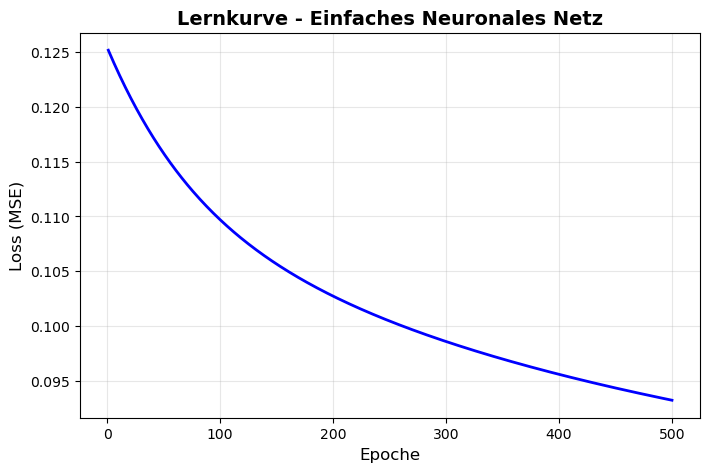

Lernkurve gespeichert: results/task1_training_curve.pdf


In [6]:
# Lernkurve plotten
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(model.loss_history) + 1), model.loss_history, 'b-', linewidth=2)
plt.xlabel('Epoche', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Lernkurve - Einfaches Neuronales Netz', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

# Speichern mit der Visualisierungsfunktion
import os
os.makedirs('../results', exist_ok=True)
plot_training_curve(model.loss_history, '../results/task1_training_curve.pdf')
print("Lernkurve gespeichert: results/task1_training_curve.pdf")

## 5. Evaluation auf dem Testdatensatz

In [8]:
# Vorhersagen auf Trainings- und Testdaten
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Konvertiere one-hot zu Klassenindizes
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Accuracy berechnen
train_acc = (y_pred_train == y_train_labels).mean()
test_acc = (y_pred_test == y_test_labels).mean()

print(f"Training Accuracy: {train_acc:.3f} ({train_acc*100:.1f}%)")
print(f"Test Accuracy:     {test_acc:.3f} ({test_acc*100:.1f}%)")

if test_acc >= 0.5:
    print("\nTest bestanden: Accuracy >= 50%")
else:
    print("\nTest nicht bestanden: Accuracy < 50%")

Training Accuracy: 0.548 (54.8%)
Test Accuracy:     0.544 (54.4%)

Test bestanden: Accuracy >= 50%


## 6. Entscheidungsregionen visualisieren

Entscheidungsregionen gespeichert: results/task1_decision_regions.pdf


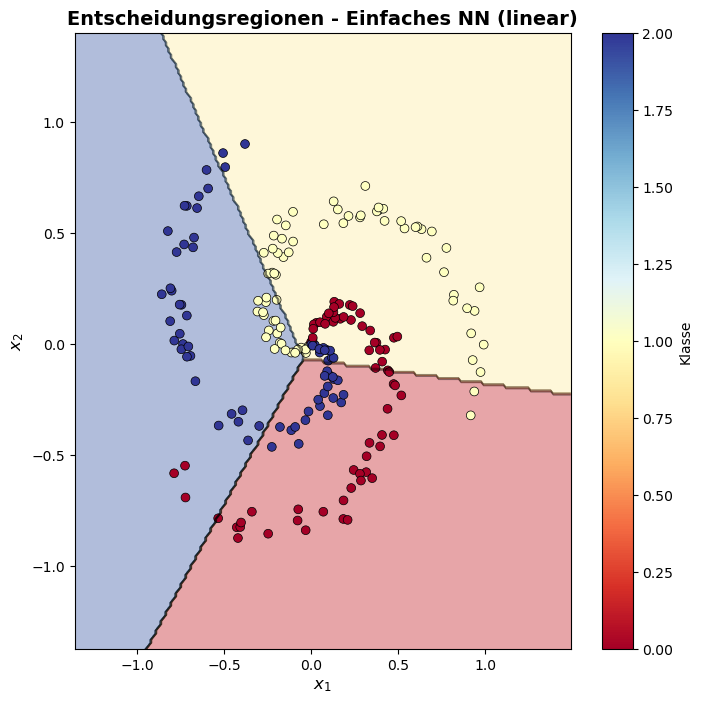

In [9]:
# Entscheidungsregionen plotten und speichern
plot_decision_regions(model, X_train, y_train, '../results/task1_decision_regions.pdf')
print("Entscheidungsregionen gespeichert: results/task1_decision_regions.pdf")

# Direkte Visualisierung im Notebook
plt.figure(figsize=(8, 8))

# Meshgrid erstellen
margin = 0.5
x_min, x_max = X_train[:, 0].min() - margin, X_train[:, 0].max() + margin
y_min, y_max = X_train[:, 1].min() - margin, X_train[:, 1].max() + margin

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Entscheidungsregionen
plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
plt.contour(xx, yy, Z, colors='k', linewidths=0.5, alpha=0.5)

# Datenpunkte
y_train_labels = np.argmax(y_train, axis=1)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_labels, 
                      cmap='RdYlBu', edgecolor='k', s=40, linewidth=0.5)

plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('Entscheidungsregionen - Einfaches NN (linear)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Klasse')
plt.show()

## 7. Diskussion

### Warum ist die Accuracy begrenzt?

Ein einfaches neuronales Netz **ohne Hidden Layer** kann nur **lineare Entscheidungsgrenzen** lernen. 

Der Spiral-Datensatz ist jedoch **nicht linear separierbar** - die drei Klassen sind spiralförmig ineinander verschlungen. Mit linearen Grenzen ist es daher unmöglich, alle Klassen perfekt zu trennen.

**Erwartete Accuracy: ~50-60%** (besser als Zufall bei 3 Klassen, aber weit von 100% entfernt)